Mounting Google Drive

In [1]:

!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [3]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import numpy as np

from utils import (
   test, train, plot_losses, plot_incorrect_prediction

)

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [5]:
train_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation((-10., 10.), fill=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


Downloading MNIST dataset and splitting to train and test set

In [6]:
train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:13<00:00, 12695538.71it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [7]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Creating Data Loaders from train data and test data

In [8]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

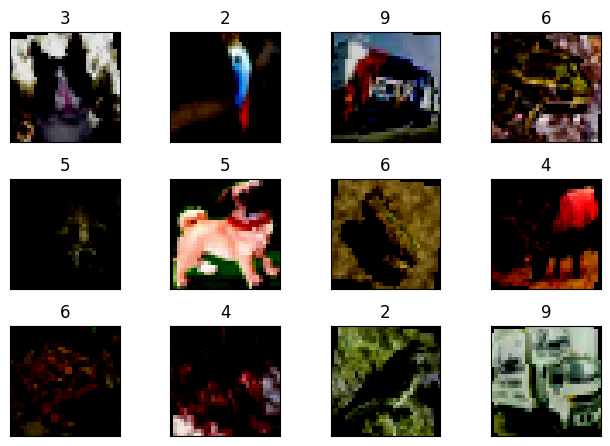

In [9]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(np.transpose(batch_data[i], (1, 2, 0)), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

Transferring model to GPU and printing model summary

In [10]:
model1 = Net(norm="GN").to(device)
summary(model1, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 10, 32, 32]             900
              ReLU-6           [-1, 10, 32, 32]               0
         GroupNorm-7           [-1, 10, 32, 32]              20
           Dropout-8           [-1, 10, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             160
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 24, 16, 16]           3,456
             ReLU-12           [-1, 24, 16, 16]               0
        GroupNorm-13           [-1, 24, 16, 16]              48
          Dropout-14           [-1, 24,

Training and evaluating the model

In [11]:
model =  Net(norm="GN").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=1.5472 Batch_id=97 Accuracy=31.04: 100%|██████████| 98/98 [00:42<00:00,  2.30it/s]


Test set: Average loss: 1.5848, Accuracy: 3947/10000 (39.47%)

EPOCH: 1


Train: Loss=1.2961 Batch_id=97 Accuracy=45.09: 100%|██████████| 98/98 [00:42<00:00,  2.28it/s]


Test set: Average loss: 1.3733, Accuracy: 4950/10000 (49.50%)

EPOCH: 2


Train: Loss=1.3072 Batch_id=97 Accuracy=52.57: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]


Test set: Average loss: 1.2516, Accuracy: 5343/10000 (53.43%)

EPOCH: 3


Train: Loss=1.1073 Batch_id=97 Accuracy=56.87: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]


Test set: Average loss: 1.1165, Accuracy: 5898/10000 (58.98%)

EPOCH: 4


Train: Loss=1.1115 Batch_id=97 Accuracy=59.57: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]


Test set: Average loss: 1.1133, Accuracy: 5920/10000 (59.20%)

EPOCH: 5


Train: Loss=1.0034 Batch_id=97 Accuracy=61.65: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s]


Test set: Average loss: 1.0363, Accuracy: 6231/10000 (62.31%)

EPOCH: 6


Train: Loss=1.0754 Batch_id=97 Accuracy=63.37: 100%|██████████| 98/98 [00:44<00:00,  2.19it/s]


Test set: Average loss: 0.9729, Accuracy: 6456/10000 (64.56%)

EPOCH: 7


Train: Loss=1.0452 Batch_id=97 Accuracy=64.47: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]


Test set: Average loss: 0.9518, Accuracy: 6610/10000 (66.10%)

EPOCH: 8


Train: Loss=0.9144 Batch_id=97 Accuracy=65.73: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]


Test set: Average loss: 0.9807, Accuracy: 6515/10000 (65.15%)

EPOCH: 9


Train: Loss=0.8824 Batch_id=97 Accuracy=67.05: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]


Test set: Average loss: 0.9230, Accuracy: 6730/10000 (67.30%)

EPOCH: 10


Train: Loss=0.8322 Batch_id=97 Accuracy=67.43: 100%|██████████| 98/98 [00:43<00:00,  2.25it/s]


Test set: Average loss: 0.9083, Accuracy: 6742/10000 (67.42%)

EPOCH: 11


Train: Loss=0.8996 Batch_id=97 Accuracy=68.35: 100%|██████████| 98/98 [00:46<00:00,  2.10it/s]


Test set: Average loss: 0.8967, Accuracy: 6847/10000 (68.47%)

EPOCH: 12


Train: Loss=0.8046 Batch_id=97 Accuracy=69.04: 100%|██████████| 98/98 [00:44<00:00,  2.20it/s]


Test set: Average loss: 0.9315, Accuracy: 6717/10000 (67.17%)

EPOCH: 13


Train: Loss=0.8049 Batch_id=97 Accuracy=69.55: 100%|██████████| 98/98 [00:43<00:00,  2.23it/s]


Test set: Average loss: 0.8569, Accuracy: 6951/10000 (69.51%)

EPOCH: 14


Train: Loss=0.9002 Batch_id=97 Accuracy=70.54: 100%|██████████| 98/98 [00:44<00:00,  2.18it/s]


Test set: Average loss: 0.8159, Accuracy: 7133/10000 (71.33%)

EPOCH: 15


Train: Loss=0.8963 Batch_id=97 Accuracy=70.85: 100%|██████████| 98/98 [00:44<00:00,  2.22it/s]


Test set: Average loss: 0.8012, Accuracy: 7178/10000 (71.78%)

EPOCH: 16


Train: Loss=0.7767 Batch_id=97 Accuracy=71.63: 100%|██████████| 98/98 [00:43<00:00,  2.24it/s]


Test set: Average loss: 0.7672, Accuracy: 7295/10000 (72.95%)

EPOCH: 17


Train: Loss=0.7894 Batch_id=97 Accuracy=72.02: 100%|██████████| 98/98 [00:44<00:00,  2.18it/s]


Test set: Average loss: 0.8004, Accuracy: 7237/10000 (72.37%)

EPOCH: 18


Train: Loss=0.7317 Batch_id=97 Accuracy=72.50: 100%|██████████| 98/98 [00:45<00:00,  2.18it/s]


Test set: Average loss: 0.7819, Accuracy: 7277/10000 (72.77%)

EPOCH: 19


Train: Loss=0.8019 Batch_id=97 Accuracy=73.06: 100%|██████████| 98/98 [00:43<00:00,  2.26it/s]


Test set: Average loss: 0.7616, Accuracy: 7292/10000 (72.92%)



## Plot Losses

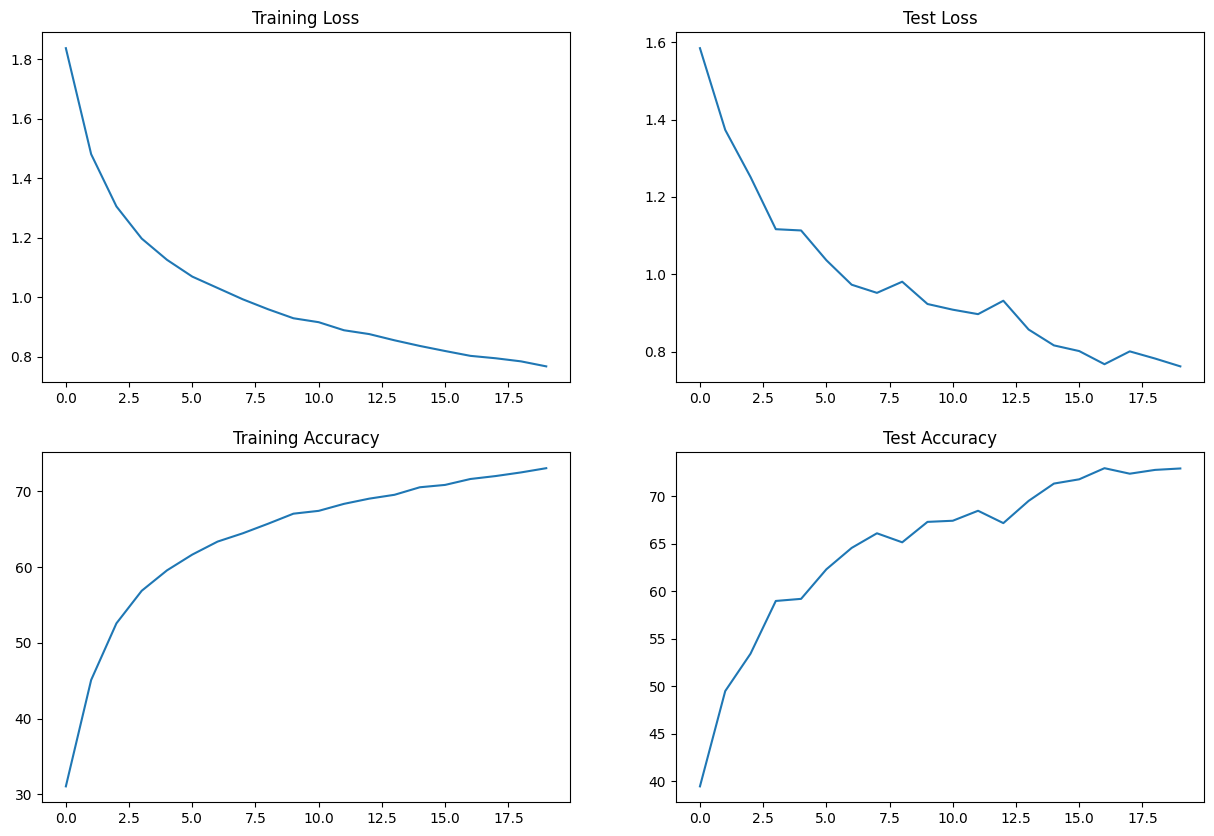

In [12]:
plot_losses()

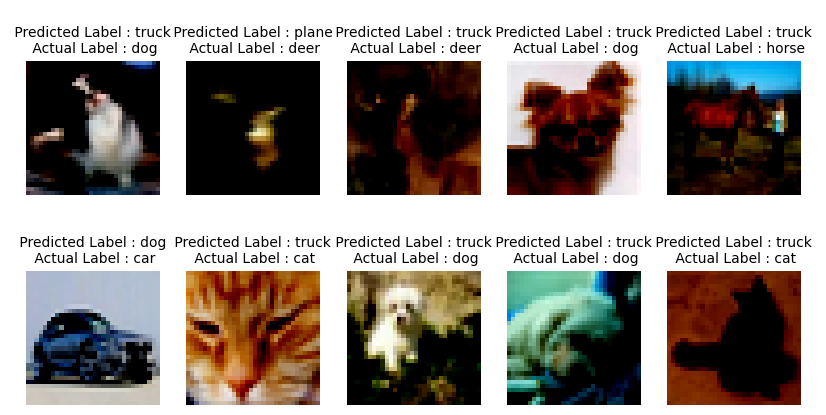

In [13]:
wrong_prediction_list = []
model1.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model1(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the maximum probabilities
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))
plot_incorrect_prediction(wrong_prediction_list, n=10 )